 

 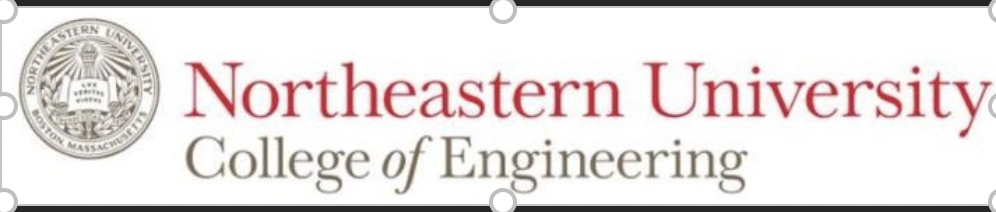
# **Data Analytics Engineering**  

 
# **IE 7300: Statistical Learning for Engineering Project Report**

 
# Milestone: Project EDA 


# Internet Usage Data Analysis 
 

Submitted by: Gauri Damle 

Email: damle.g@northeastern.edu 

Submission date:12/17/2022 

NUID :- NU002931881

# **Project Overview**



The survey data collected on Internet users  at Graphics and Visualization Unit Georgia Tech, continues to provide a rich source of information on the different range of topics. 

This survey data contains general demographic information on internet users in 1997. Technology demographics and web commerce data is used widely in order to identify customer base by many companies. This helps in identifying social economic determinants of the internet users and perform segmentation based on Age, Gender, Household Income, Race, Years on internet, Marital status etc. 

It has the survey details on demographics of internet users which can be further incorporated into different of news stories, articles, books, academic theses, radio shows, television etc. 

In this project the deatiled exploration of Internet usage data is proposed for classifying internet users using both supervised and unsupervised learning.

# **Problem Statement**

The objective of this project is to analyze the demographic information of Internet users with both clustering techniques as well as classification techniques.


*   From Unsupervised techniques optimal clusters are identified for Internet users.

*   Then supervised methods are used to classify these 2 cluster users as Novice Internet users and Expert users with goal to perform Customer segmentation.


# **Dataset Used**

The dataset is collected from UCI website link as follows:
https://archive.ics.uci.edu/ml/datasets/Internet+Usage+Data


### **Data Description:**

This data comes from a survey conducted by the Graphics and Visualization Unit at Georgia Tech October 10 to November 16, 1997.
The subset of the survey provided is this "general demographics" of internet users. The data have been recorded as entirely numeric, with an index to the codes described in the "Coding" file.

### **Data Collection:**

It is a demographics of internet usage dataset of 1.5M uncompressed size. This dataset includes 10104 rows and 72 feature variables. Each row corresponds to an internet user, and includes many other variables like Education level, Gender, Age, Location, Income etc.


**Rows: 10104 
Columns: 72**


These 72 columns are about age, gender, race etc. of internet users and their values are encoded in numeric data. Out of these 72 columns 14 are selected for building clustering models and perform segmentation of Internet users. The dataset does not contain target variable, thus unsupervised methods are employed.

### **Data Dictionary**

1)Use of the Internet = "Years on Internet"

    Under 6 mo=0
    6-12 mo=1
    1-3 yr=2
    4-6 yr=3 
    Over 7 yr=4




2)Access Internet ="Primary Place of WWW Access"


    Primarily home=0 
    Primarily work=1 
    Home=2
    Work=3
    Public=4 
    Distributed=5 
    Friend=6


3)Age


    not say=0 
    under 5=1 
    over 80=80


4)Occupation="Major Occupation"

    Computer=0 
    management=1 
    professional=2 
    education=3 
    other=99



5)Education Level = "Education Attainment"

    grammar=0 
    high school=1 
    professional=2 
    some college=3 
    college=4 
    masters=5 
    doctoral=6 
    special=7 
    other=99

6)Gender


    female=0 
    male=1







7)Marital status

    not say=0 
    divorced=1
    living with another=99
    married=3 
    separated=4 
    single=5
    widowed=6



8)Household Income

    not say=0 
    under $10=1 
    $10-19=2
    $20-29=3 
    $30-39=4 
    $40-49=5 
    $50-74=6 
    $75-99=7 
    Over $100=8




9)Computer platform ="Primary Computing Platform"

    dos=0
    Macintosh=1
    Win95=2
    Windows=3
    Inix=4
    OS2=5
    NT=6
    PC 4=7
    VT 100=8
    Don't know=98
    Other=99

10)Issues facing the internet="Most Import Issue Facing the Internet"


    axes=0 
    privacy=1 
    censorship=2 
    culture=3 
    encryption=4 
    language=5 
    navigation=6 
    don't know=98 
    other =99

11) Race

    1 = White
    2 = Asian
    6 = Black
    0 = !Not say
    99 = Other
    5 = Native Hawaiian
    

12)Sexual Preference

    Not say=0
    Heterosexual=1
    Gay Male=2
    Lesbian=3
    Bisexual=4
    Transgender=5

13)Registered to Vote

    not say=0
    yes=1
    no=2
    not applicable=3

14)Major Geographical Location

    Africa=0
    Antarctica=1
    Asia=2
    Oceania=3
    Europe=4
    USA=5
    Canada=6
    Mexico=7
    Central America=8
    South America=9
    Middle East=10
    West Indies=11

###**Importing Modules**

In [ ]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import plotly.express as px
import random
from sklearn.utils import shuffle
import statsmodels.api as sm
import itertools
import time
from mpl_toolkits import mplot3d
from sklearn.datasets import make_blobs
from pandas import DataFrame
from abc import ABC,abstractmethod
from sklearn.base import clone

#Preprocessing methods
from sklearn.preprocessing import StandardScaler

#Split the training and test dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

### performance matrix
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import plot_confusion_matrix
!pip install scikit-plot
import scikitplot as skplt
from sklearn.model_selection import StratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_absolute_error,mean_squared_error,r2_score,make_scorer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [668]:
!jupyter nbconvert --to html /content/drive/MyDrive/SemesterThree/Stats7300/Project/ProjectEDA/ProjectCheckpoint3.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/SemesterThree/Stats7300/Project/ProjectEDA/ProjectCheckpoint3.ipynb to html
[NbConvertApp] Writing 2629356 bytes to /content/drive/MyDrive/SemesterThree/Stats7300/Project/ProjectEDA/ProjectCheckpoint3.html


### **Input Data**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
dfDataset = pd.read_csv('/content/drive/MyDrive/SemesterThree/Stats7300/Project/ProjectEDA/final_general.dat',
sep=' ', header=None, error_bad_lines=False)

In [588]:
dfDataset.shape
#### out of 10104 users participating in survey 64 records had erros so 10040 records were selected

(10040, 72)

In [589]:
dfDataset.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,5,41,2,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,99,2,93819
1,2,28,2,0,0,0,0,0,0,0,...,2,0,0,0,0,1,0,4,0,95708
2,99,25,0,1,1,0,0,0,1,0,...,1,0,0,0,0,1,1,99,2,97218
3,29,28,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,4,2,91627
4,15,17,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,4,2,49906


# **Analysis** 

# **EDA**

### **Feature Engineering**

In [590]:
dfDataset.columns = [
"Actual Time",	
"Age",
"Community Building",
"Community Membership_Family",
"Community Membership_Hobbies",
"Community Membership_None",	
"Community Membership_Other",
"Community Membership_Political",
"Community Membership_Professional",	
"Community Membership_Religious",
"Community Membership_Support",
"Country",
"Disability_Cognitive",	
"Disability_Hearing",
"Disability_Motor",
"Disability_Not Impaired",
"Disability_Not Say",
"Disability_Vision",
"Education Attainment",
"Falsification of Information",
"Gender",
"Household Income",
"How You Heard About Survey_Banner",
"How You Heard About Survey_Friend",
"How You Heard About Survey_Mailing List",
"How You Heard About Survey_Others",
"How You Heard About Survey_Printed Media",
"How You Heard About Survey_Remebered",
"How You Heard About Survey_Search Engine",
"How You Heard About Survey_Usenet News",
"How You Heard About Survey_WWW Page",
"Major Geographical Location",
"Major Occupation",
"Marital Status",
"Most Import Issue Facing the Internet",	
"Opinions on Censorship",
"Primary Computing Platform",
"Primary Language",	
"Primary Place of WWW Access",	
"Race",
"Not Purchasing_Bad experience",	
"Not Purchasing_Bad press",	
"Not Purchasing_Cant find",	
"Not Purchasing_Company policy",
"Not Purchasing_Easier locally",
"Not Purchasing_Enough info",
"Not Purchasing_Judge quality",	
"Not Purchasing_Never tried",
"Not Purchasing_No credit",
"Not Purchasing_Not applicable",	
"Not Purchasing_Not option",	
"Not Purchasing_Other",
"Not Purchasing_Prefer people",
"Not Purchasing_Privacy",
"Not Purchasing_Receipt",
"Not Purchasing_Security",
"Not Purchasing_Too complicated",
"Not Purchasing_Uncomfortable",
"Not Purchasing_Unfamiliar vendor",
"Registered to Vote",
"Sexual Preference",
"Web Ordering",
"Web Page Creation",
"Who Pays for Access_Don't Know",
"Who Pays for Access_Other",
"Who Pays for Access_Parents",
"Who Pays for Access_School",
"Who Pays for Access_Self",
"Who Pays for Access_Work",
"Willingness to Pay Fees",
"Years on Internet",
"Timestamp"
]

As the Dataset is having multiple Freature most important factor is to identify irrelavent features. 

This part in feature Engineering covers removing those irrelevant features to begin with.

As we can see in multiple columns, values are one hot encoded resulting in many columns for single column. 

For example:-

Who pays for access is converted into 6 columns:-

    "Who Pays for Access_Don't Know",
    "Who Pays for Access_Other",
    "Who Pays for Access_Parents",
    "Who Pays for Access_School",
    "Who Pays for Access_Self",
    "Who Pays for Access_Work",

    "Community Membership_Family",
    "Community Membership_Hobbies",
    "Community Membership_None",	
    "Community Membership_Other",
    "Community Membership_Political",
    "Community Membership_Professional",	
    "Community Membership_Religious",
    "Community Membership_Support",

    "Not Purchasing_Bad experience",	
    "Not Purchasing_Bad press",	
    "Not Purchasing_Cant find",	
    "Not Purchasing_Company policy",
    "Not Purchasing_Easier locally",
    "Not Purchasing_Enough info",
    "Not Purchasing_Judge quality",	
    "Not Purchasing_Never tried",
    "Not Purchasing_No credit",
    "Not Purchasing_Not applicable",	
    "Not Purchasing_Not option",	
    "Not Purchasing_Other",
    "Not Purchasing_Prefer people",
    "Not Purchasing_Privacy",
    "Not Purchasing_Receipt",
    "Not Purchasing_Security",
    "Not Purchasing_Too complicated",
    "Not Purchasing_Uncomfortable",
    "Not Purchasing_Unfamiliar vendor",

    "How You Heard About Survey_Banner",
    "How You Heard About Survey_Friend",
    "How You Heard About Survey_Mailing List",
    "How You Heard About Survey_Others",
    "How You Heard About Survey_Printed Media",
    "How You Heard About Survey_Remebered",
    "How You Heard About Survey_Search Engine",
    "How You Heard About Survey_Usenet News",
    "How You Heard About Survey_WWW Page",

    "Disability_Cognitive",	
    "Disability_Hearing",
    "Disability_Motor",
    "Disability_Not Impaired",link
    "Disability_Not Say",
    "Disability_Vision",

As these are not affecting target varible they are excluded as part of feature engineering.

### **Encoding the data**

Very crucial **encoding** which is observed throught the survey is as follows:-

    Universal:  (when applicable)
    Not Say! = 0  
    Don't Know = 98
    Other = 99

### **Feature Selection**


As mentioned in Data dictionary following 14 columns are selected:-

**Note** the values of columns mentioed in the data dictionary file were not matching with datase columns,thus careful checking is done to match column name and data dictionary mentioned names. 


In [591]:
df = dfDataset[["Years on Internet","Primary Place of WWW Access",
                "Age","Major Occupation",
                "Education Attainment","Gender",
                "Marital Status","Household Income",
                "Primary Computing Platform",
                "Most Import Issue Facing the Internet","Race",
                "Sexual Preference","Registered to Vote",
                "Major Geographical Location"]]

These 72 columns are about age, gender, race etc. of internet users and their 
values are encoded in numeric data. 

Out of these 72 columns 14 are selected for feeding it to machine learning models.


The dataset does not contain target variable, thus **unsupervised** methods are employed for clustering in datasets using KMeans, hierarchial and DBscan respectively.

Later classification models are used to classify different internet users in different categories like Expert user, Novice user using support vector machines (SVM), random forests (RF) and neural networks (NN), respectively.

In [309]:
df.shape

(10040, 14)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10040 entries, 0 to 10039
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Years on Internet                      10040 non-null  int64  
 1   Primary Place of WWW Access            10040 non-null  int64  
 2   Age                                    10040 non-null  int64  
 3   Major Occupation                       10040 non-null  int64  
 4   Education Attainment                   10040 non-null  int64  
 5   Gender                                 10040 non-null  int64  
 6   Marital Status                         10040 non-null  int64  
 7   Household Income                       10040 non-null  int64  
 8   Primary Computing Platform             7365 non-null   float64
 9   Most Import Issue Facing the Internet  10040 non-null  int64  
 10  Race                                   10040 non-null  int64  
 11  Se

### **Null checks**

As it can be seen that computing platform values are missing, which can be filled using imputation techniques.

Here 98 value represents unknown so we can fill missing values with 98.

In [311]:
df.isna().sum()

Years on Internet                           0
Primary Place of WWW Access                 0
Age                                         0
Major Occupation                            0
Education Attainment                        0
Gender                                      0
Marital Status                              0
Household Income                            0
Primary Computing Platform               2675
Most Import Issue Facing the Internet       0
Race                                        0
Sexual Preference                           0
Registered to Vote                          0
Major Geographical Location                 0
dtype: int64

In [312]:
df["Primary Computing Platform"] = df["Primary Computing Platform"].fillna(value=98)

In [313]:
df.isna().sum()

Years on Internet                        0
Primary Place of WWW Access              0
Age                                      0
Major Occupation                         0
Education Attainment                     0
Gender                                   0
Marital Status                           0
Household Income                         0
Primary Computing Platform               0
Most Import Issue Facing the Internet    0
Race                                     0
Sexual Preference                        0
Registered to Vote                       0
Major Geographical Location              0
dtype: int64

### **Duplication Checks**

In [314]:
df.nunique()

Years on Internet                         5
Primary Place of WWW Access               8
Age                                      77
Major Occupation                          5
Education Attainment                      9
Gender                                    2
Marital Status                            7
Household Income                          9
Primary Computing Platform               11
Most Import Issue Facing the Internet     9
Race                                      8
Sexual Preference                         6
Registered to Vote                        4
Major Geographical Location               9
dtype: int64

From here we can see the **Continouous** and **categotical** features. Age is continuous feature, It can be converted to classes and made categorical after studying its distribution.

### **Summary Statistics**

In [315]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Years on Internet,10040.0,1.769920,1.151036,0.0,1.0,2.0,3.0,4.0
Primary Place of WWW Access,10040.0,1.915239,7.720300,0.0,0.0,1.0,2.0,99.0
Age,10040.0,34.595219,14.789693,0.0,24.0,33.0,45.0,80.0
Major Occupation,10040.0,24.259363,41.159665,0.0,1.0,2.0,3.0,99.0
Education Attainment,10040.0,5.029781,12.128278,0.0,3.0,4.0,4.0,99.0
Gender,10040.0,0.614343,0.486774,0.0,0.0,1.0,1.0,1.0
Marital Status,10040.0,12.522709,27.712164,0.0,3.0,3.0,5.0,99.0
Household Income,10040.0,3.960558,2.541740,0.0,2.0,4.0,6.0,8.0
Primary Computing Platform,10040.0,28.908068,42.927360,0.0,2.0,2.0,98.0,99.0
Most Import Issue Facing the Internet,10040.0,15.503287,33.108177,0.0,1.0,2.0,6.0,99.0


From the describe command we get the statistics summary.

From this summary statistics we can conclude following:-


On average of use of internet for users is 6 months to 1 year. Bases on internet usage categories we will classify users as Expert or Novice users.

Primary place to access the internet is work place.

Age is continuous variable with max age recorded as 80 and on an average all internet users fall in age bucket of 34 years.

Major occupation is categorical feature with most users falling in category of others than management, education and computer profession.

"Gender" and "registered to vote" are binary features.

USA encoded as 5 is major Geograpfical location to study. As it is repeated in median, 25%, 75%.

Other features like "race", "Household Income","Primary Computing Platform" and "Most Import Issue Facing the Internet" are to plotted with bar plots to check its categorical values.


### **EDA Univariate Analysis**

For Univariate analysis lets first divide the features in **continuous** and **categorical**.

In [83]:
num_cols = ["Age"]
binary_cols = ["Gender","Registered to Vote"]
categ_cols1 = ["Race","Years on Internet","Primary Place of WWW Access","Major Occupation",]
categ_cols2=[ "Education Attainment","Marital Status","Household Income"]

categ_cols3=["Primary Computing Platform", "Most Import Issue Facing the Internet",
              "Major Geographical Location"]

We perform univariate analysis to check the distributions (using **Histograms**)of all continuous variables and understand their statistical inference. 

Similarly for categorical variables we check their **bar** plots and visualize them. As all features are encoded they are mostly categorical values.

Feature Name : Age
Skew : 0.19


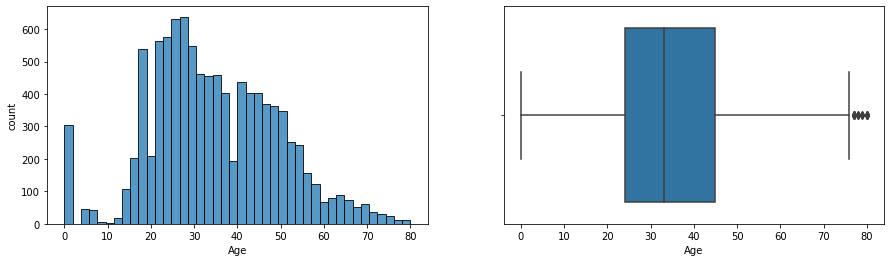

In [72]:
for col in num_cols:
    print('Feature Name :',col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(x=df[col])
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

**Insights**

From hist plots and box plots we can learn following key points :-

50% of Internet users are of median age 35 and fall in range from 20 to 45.
Some ouliers in age feature are for age 75 and above.


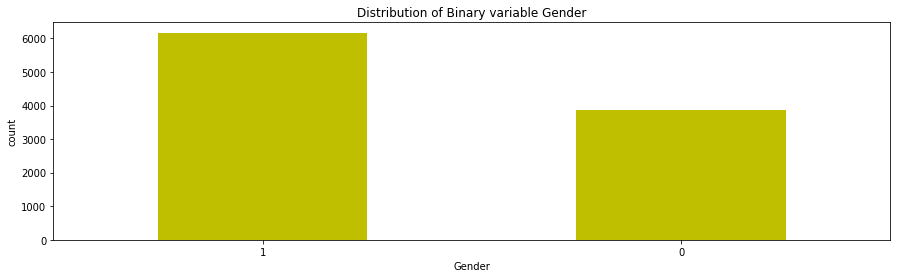

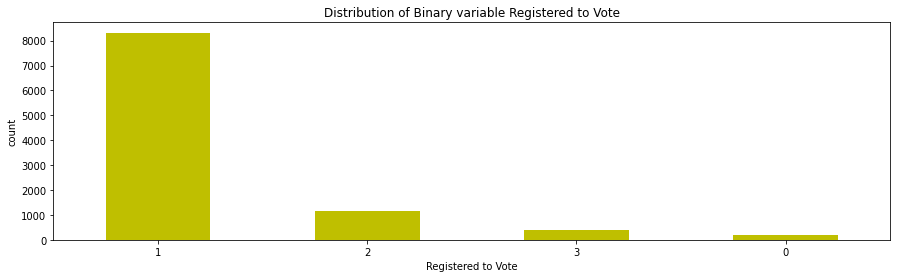

In [84]:
for col in binary_cols:
   
    plt.figure(figsize = (15, 4))
    df[col].value_counts(sort=True).plot(
        kind='bar', color='y', rot=0)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.title("Distribution of Binary variable "+ col)
    plt.show()

**Insights**

- Number of male users are more than female. 
- Good to see that most of users are registered to vote

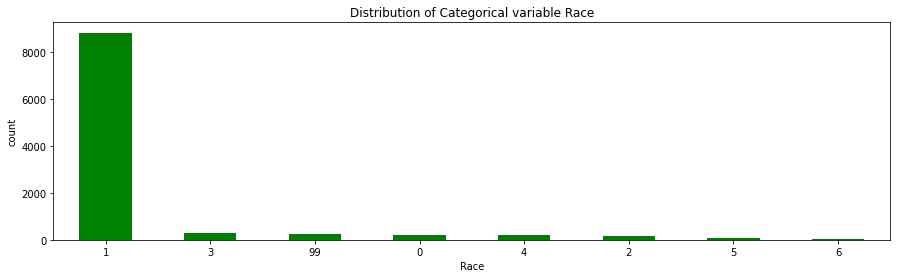

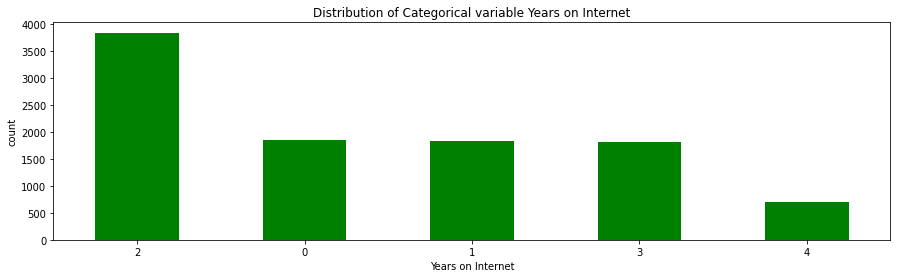

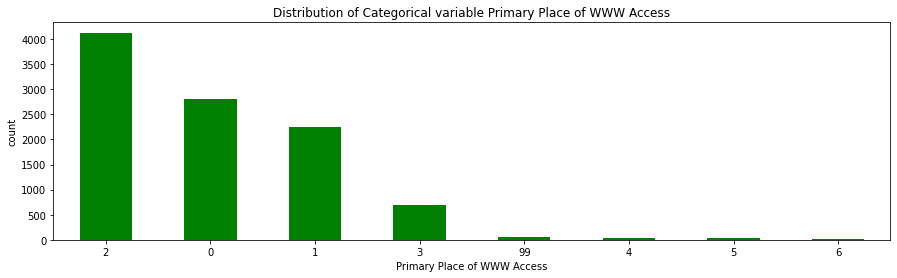

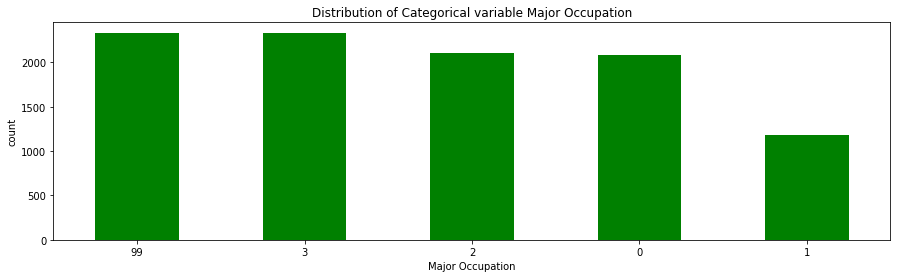

In [74]:
for col in categ_cols1:
   
    plt.figure(figsize = (15, 4))
    df[col].value_counts(sort=True).plot(
        kind='bar', color='g', rot=0)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.title("Distribution of Categorical variable "+ col)
    plt.show()

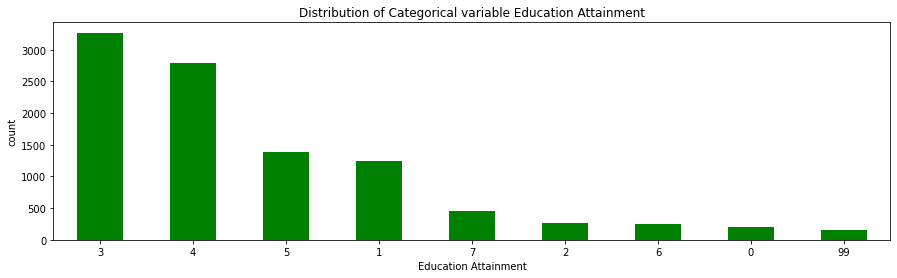

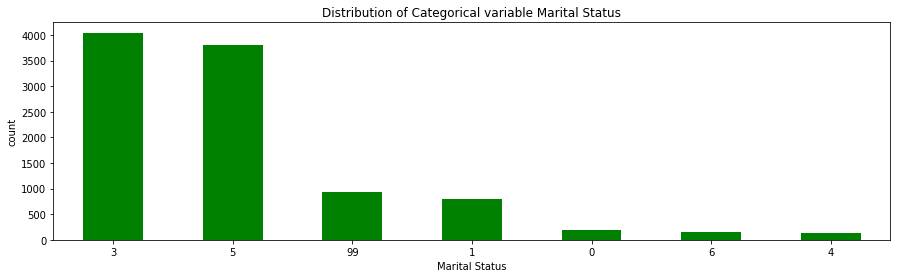

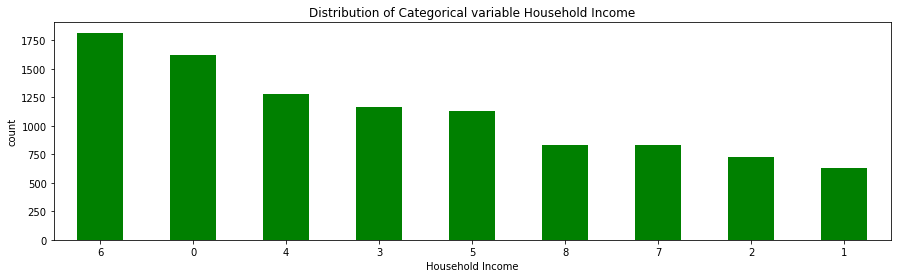

In [52]:
for col in categ_cols2:
   
    plt.figure(figsize = (15, 4))
    df[col].value_counts(sort=True).plot(
        kind='bar', color='g', rot=0)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.title("Distribution of Categorical variable "+ col)
    plt.show()

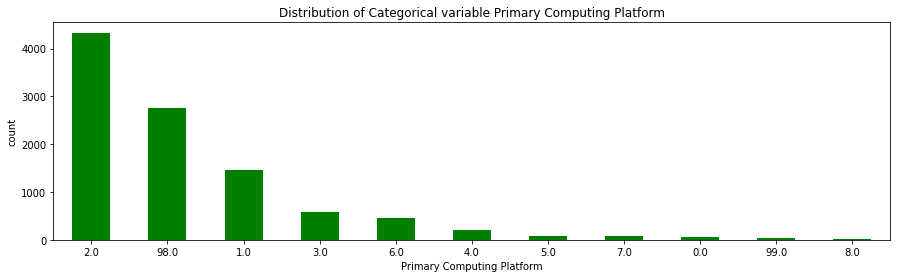

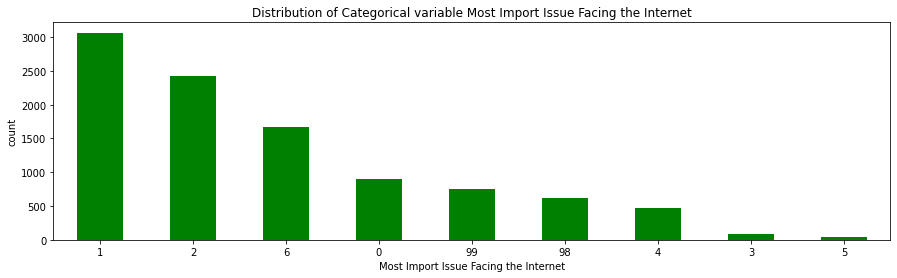

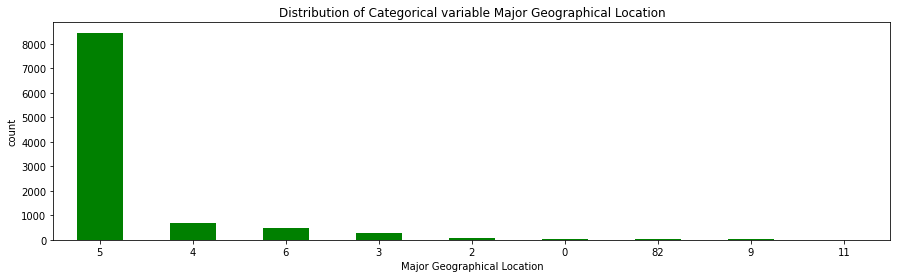

In [53]:
for col in categ_cols3:
   
    plt.figure(figsize = (15, 4))
    df[col].value_counts(sort=True).plot(
        kind='bar', color='g', rot=0)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.title("Distribution of Categorical variable "+ col)
    plt.show()

**Insights**

From the count plots, we can get following observations:-

- Most of the users are from years 1 to 3 on internet.
- Primary place to access internet is from Home followed by work.
- Most of the users are from educational occupation.
- Educational level of users is predominantly college students followed by high school going students for majority.
- Users are either single or married most of time.
- Commom household income range is 50 to 75k range.
- Majority of users are using Windows followed by Mac computing platform.
- Privacy and censorship are most important issues faced by internet users followed by navigation, axes and encryption.
- Almost 90% of users come from USA continent. Very less users come from Africa, west indies and south America.

### **EDA Bivariate Analysis**

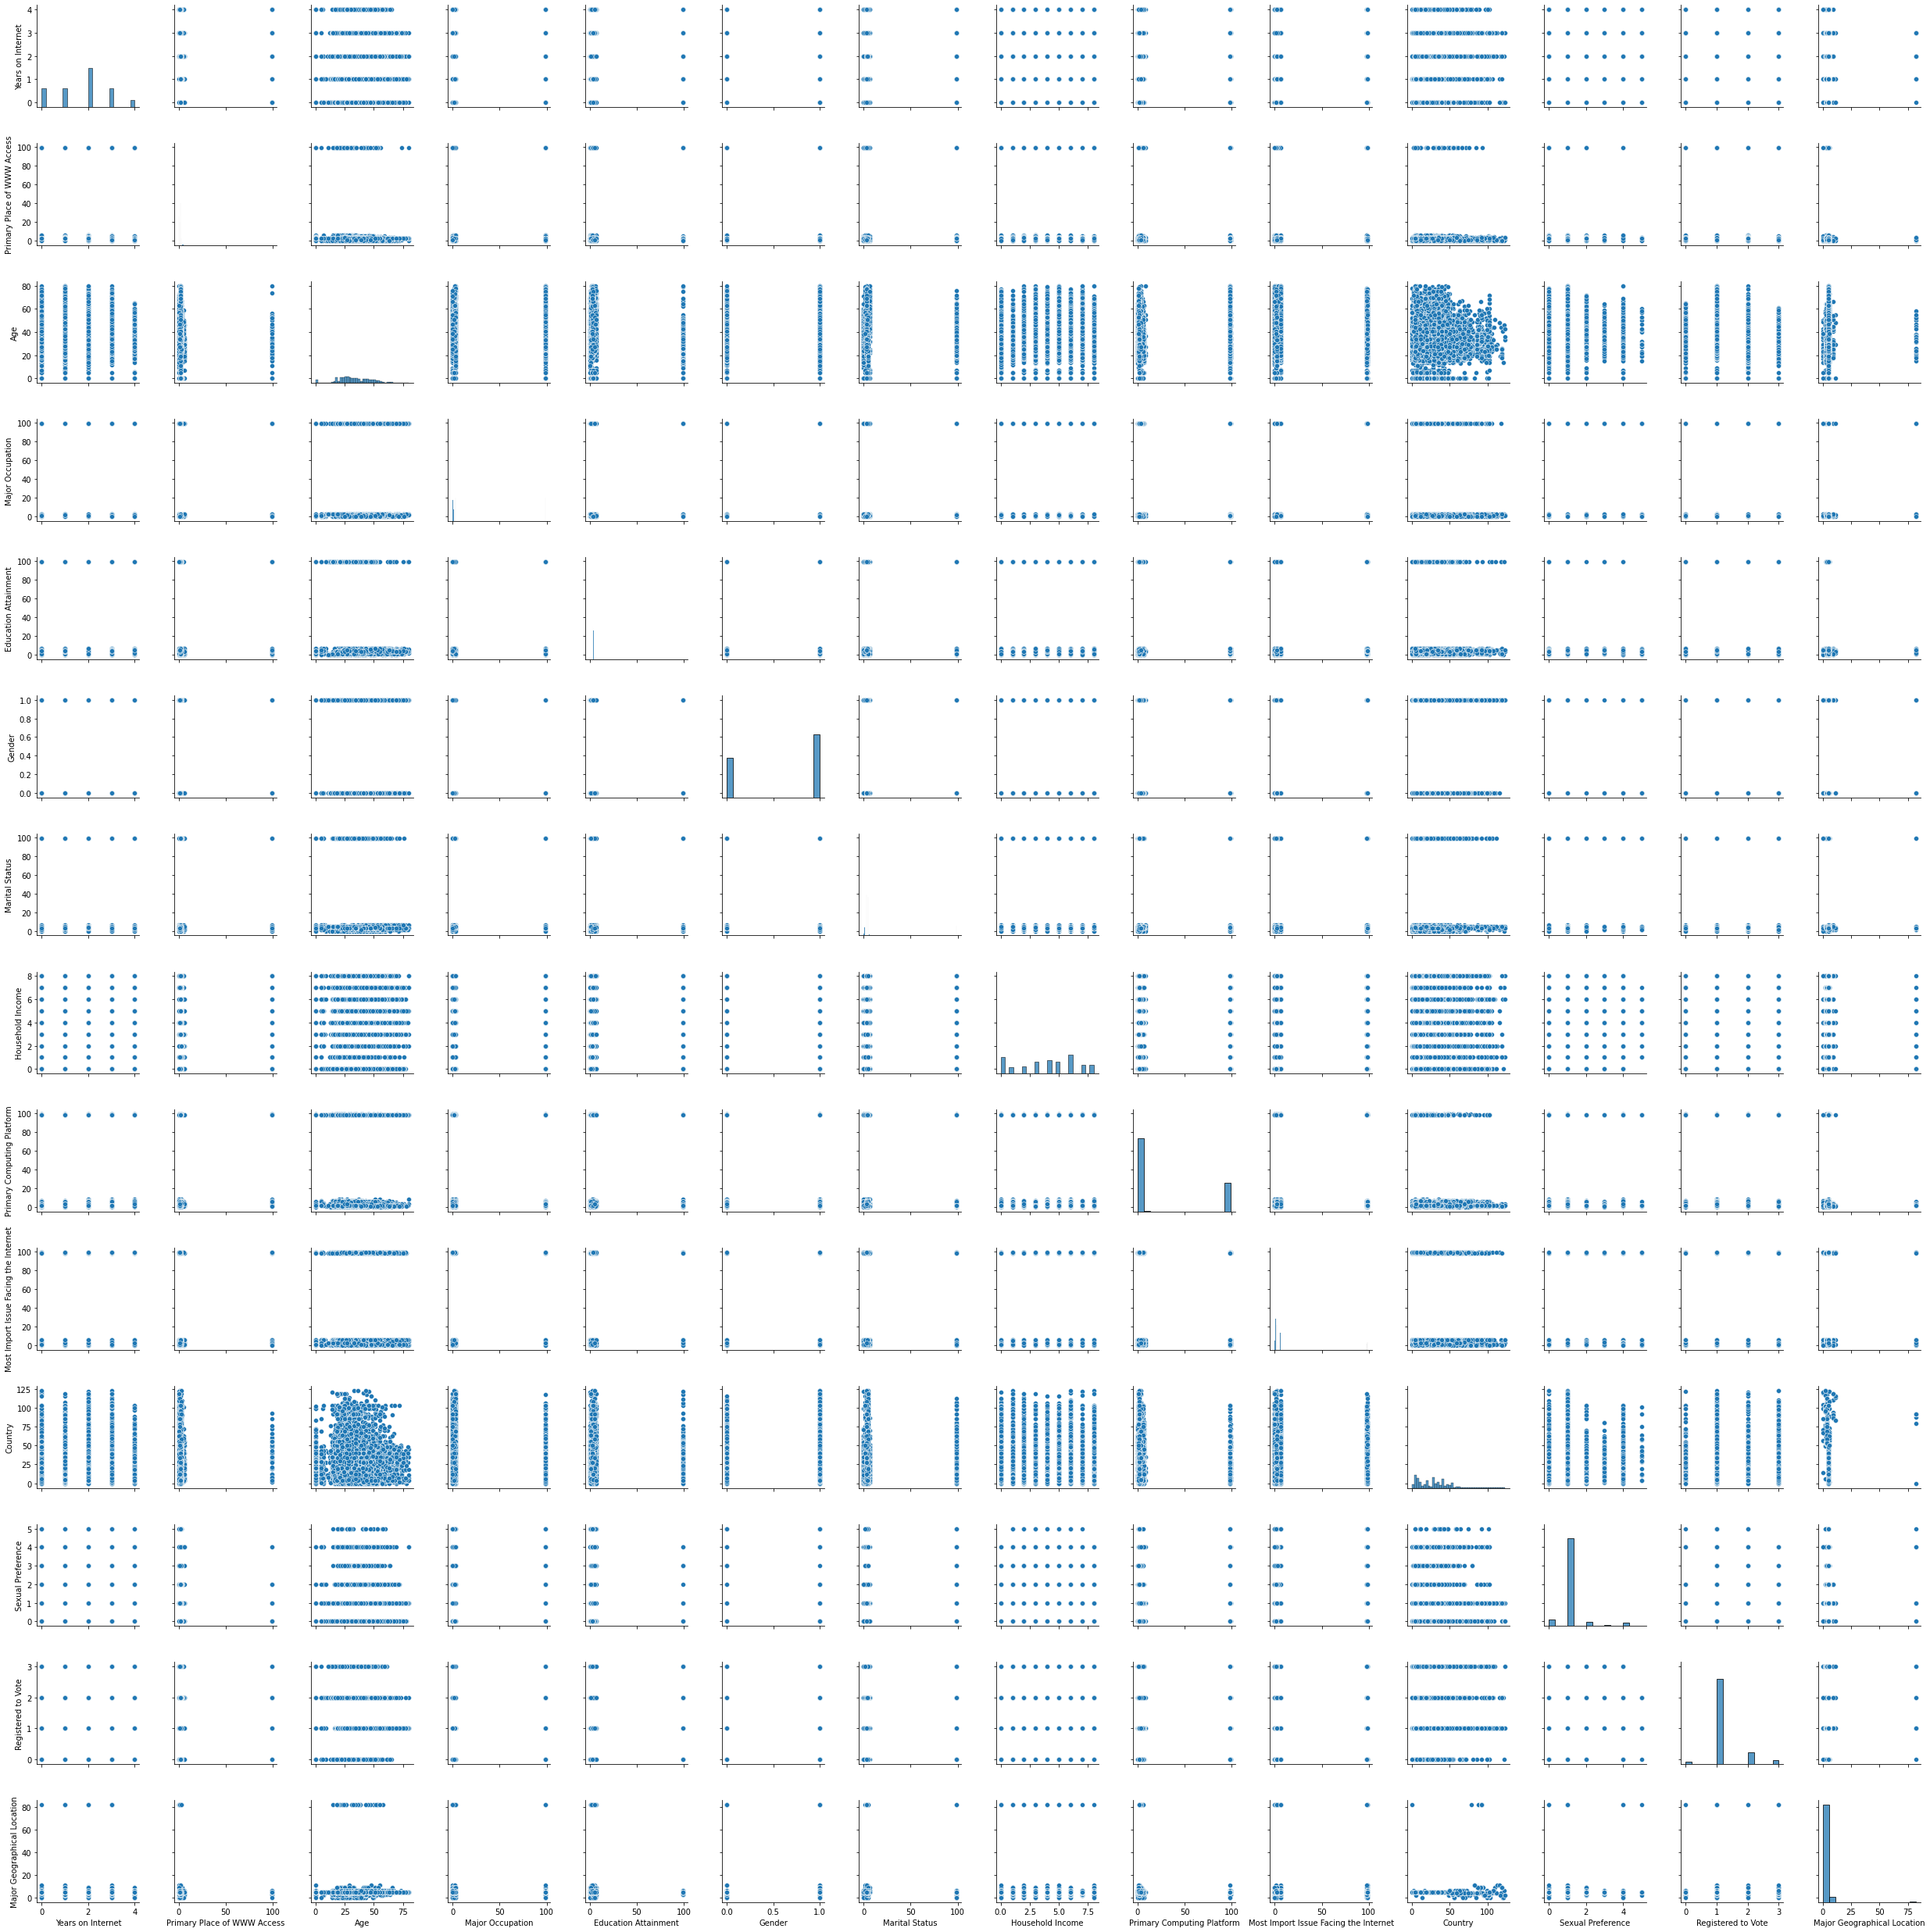

In [54]:
sns.pairplot(df)
plt.show()

Insights drawn from pair plots:

- From geographical location plot it is clear that most of data points are coming from USA.
- For the majority of users their marital status is married or single. Separated, widowed and divorced people were not big users. 
- For most marital status groups were three years or less on the Internet.
- Relation between age and number of years on the internet can be looked into as age affects the classification target Years on Internet
- Relation between marital status and number of years on the internet can be studied in depth for the same reasons described for age.

### **Converting Age Classes**

In [85]:
conditions = [
    (df['Age'] < 20),
    (df['Age'] >= 20) & (df['Age'] < 40),
    (df['Age'] >= 40) & (df['Age'] < 60),
    (df['Age'] >= 60) & (df['Age'] < 80),
    (df['Age'] >= 80) ]

values = [1,2,3,4,5]

df['Age_classes'] = np.select(conditions, values)

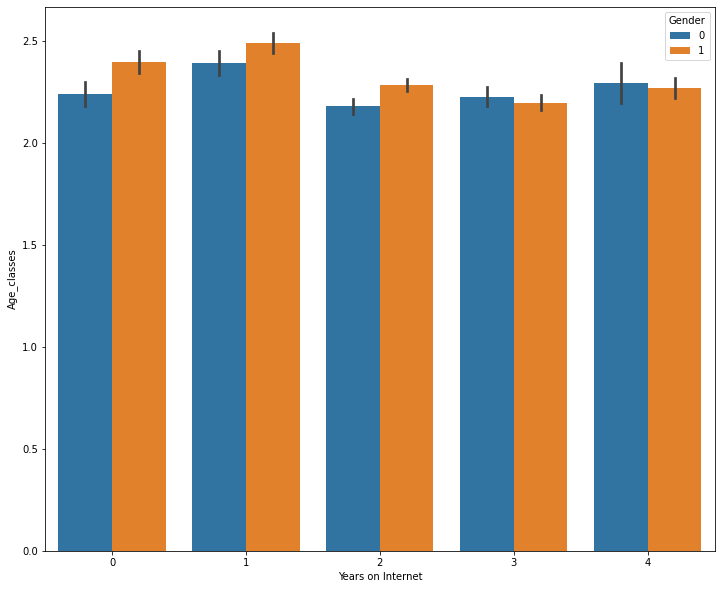

In [86]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="Years on Internet",y="Age_classes", hue="Gender")
plt.show()

Male users are more as compared to female.

The plot shows most of internet users are of 1 to 3 years of usage and from age 20 to 50.



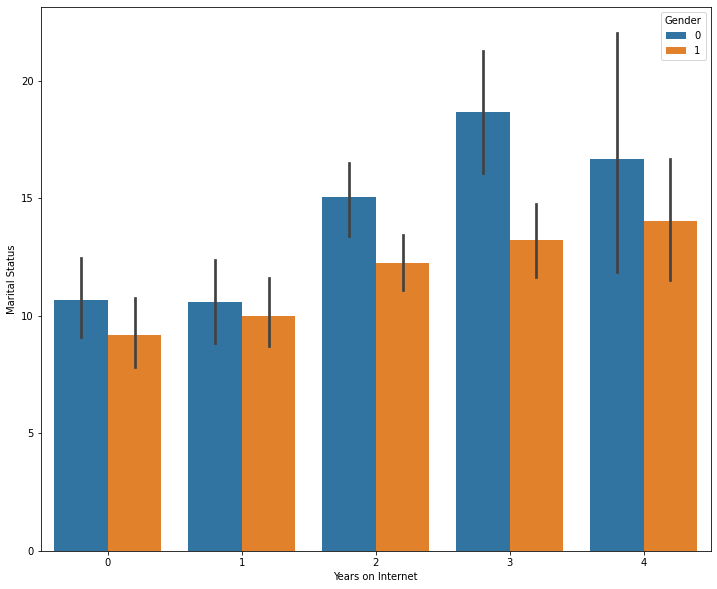

In [88]:
plt.figure(figsize=(12,10))
sns.barplot(data=df, x="Years on Internet",y="Marital Status", hue="Gender")
plt.show()

Most of users are either married or single 3 or 1.

And there is more number male users married with subsequent internet usage of more than 2 years which makes complete sense.

Most of users are either married or single and been using internet for class2 i=that is 1 to 3 yeras.


### **EDA Multivariate Analysis**

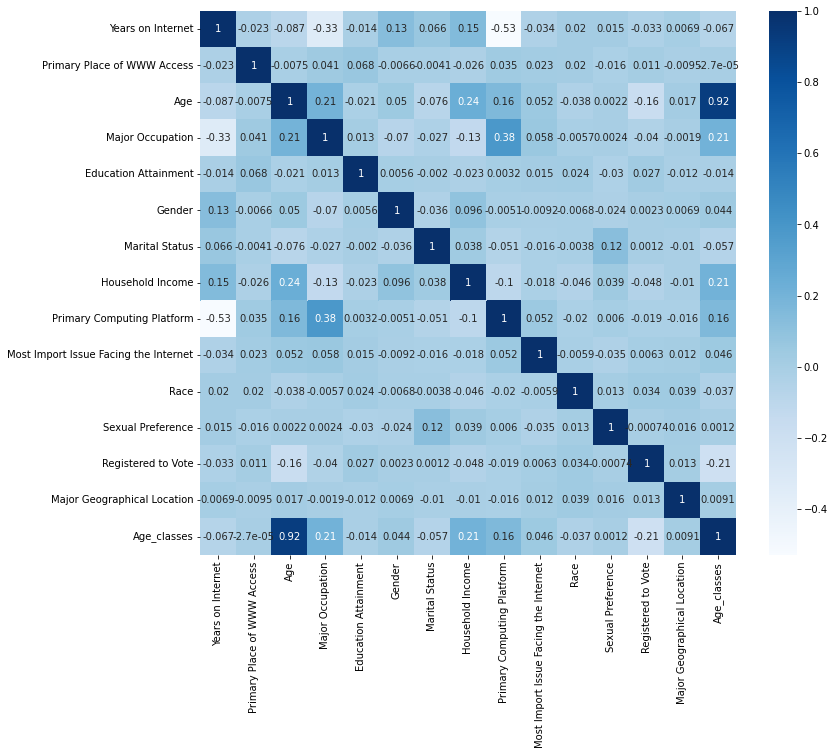

In [89]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

**Insigths**

From the Heat map, we can conculde the following:

No strong positive correlation was observed between features.

Age is moderately positive in correlation to Household Incode.

Marital status and sexual preference are positively correlated. 

Years on Internet in negative correlation to age, as years increase age value is decreasing this is making sense as young students use more internet than elder population.

Rest of other features are categorical so could not be utilized here.


# **Algorithm and models**



**Unsupervised techniques** 
 
*   K-Means
*   Hierarchial Clustering
*   DBscan


 
 **Supervised techniques** 

*   Support vector machines (SVM)
*   Random forests (RF) 
*   Neural networks (NN)



# **Unsupervised Methodology**

## **K means clustering with an optimum number of clusters (k)**

#### **Elbow method**

In [156]:
### Computing optimal cluster with elbow method
from sklearn.cluster import KMeans
k = []
wcss = []

for i in range(1,10):
  mdl = KMeans(n_clusters=i)
  mdl.fit(df)
  k.append(i)
  wcss.append(mdl.inertia_)

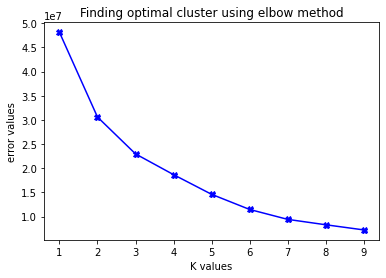

In [157]:
plt.plot(k,wcss,'bX-')
plt.title("Finding optimal cluster using elbow method")
plt.xlabel("K values")
plt.ylabel("error values")
plt.show()


From the K value plot we can be sure that for cluster size 2 the error starts decreasing in constant fasion and curve plateaus.

Thus 2 is th optimal cluster as per the elbow technique.

Now we will use PCA to reduce 12 features to 2 using PCA.

#### a) Show top 2 of the PCA component output

In [158]:
### PCA component
class PCA:
    """
     Implement the PCA from scratch
    """
    def __init__(self, n_components):
        """
         Constructor for PCA class

        Args:
            n_components (_type_): _description_
        """
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        """
        Fit the PCA model

        Args:
            X (_type_): _description_
        """
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [159]:
# Project the data onto the 3 primary principal components
pca = PCA(2)
pca.fit(df1)
X_projected = pca.transform(df1)

print("Shape of X:", df1.shape)
print("Shape of transformed X:", X_projected.shape)



Shape of X: (7354, 15)
Shape of transformed X: (7354, 2)


In [160]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

Transformed 12 feature variables into 3 components with highest variance as per asked.

#### b) Plot the PCA 1, PCA 2 components

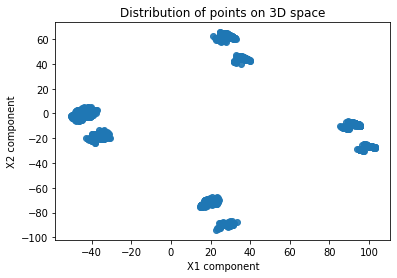

In [161]:
fig = plt.figure()
ax = plt.axes()



# Data for three-dimensional scattered points
ax.scatter(x1, x2,alpha= 0.9)
plt.title("Distribution of points on 3D space")
plt.xlabel("X1 component")
plt.ylabel("X2 component")

plt.show()

#### Helper functions for K-means

In [162]:
def init_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([cx1, cx2])
    return np.asarray(arr)

In [163]:
def dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

In [164]:
def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

In [165]:
def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

In [166]:
def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res

In [167]:
def show_clusters(X, cluster, cg):
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

In [168]:
def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(k, X, cg_prev)
        show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster


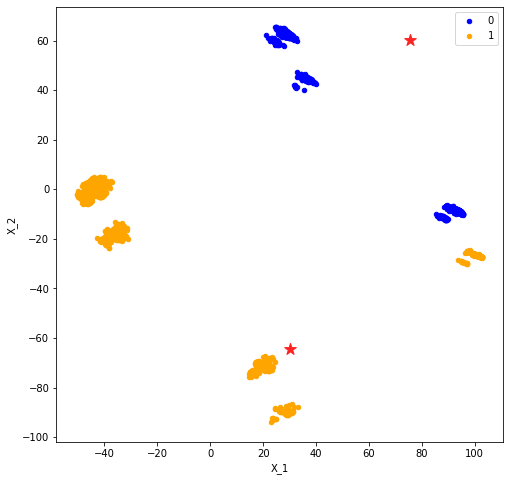

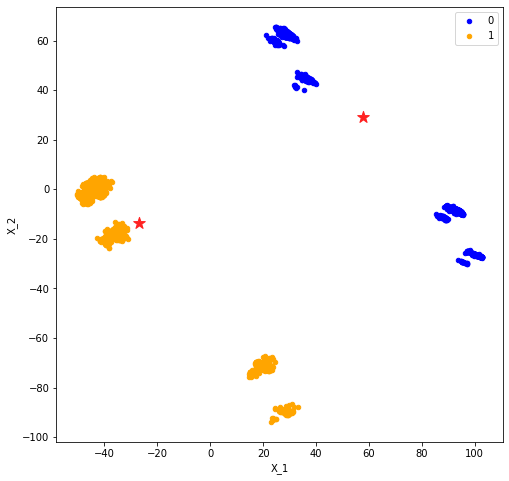

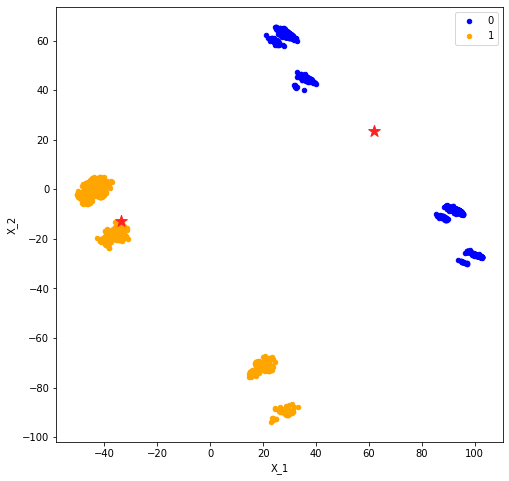

In [169]:
cluster = k_means(2, X_projected)

### PCA


---


- As we had total 12 features for the purpose of making sense out of it we used 
PCA and projected them into lower dimensions.

- Dimentionality reduction using PCA gave projected components x_1 and x_2 which are used for clustering using KMeans custom model.

- Thus PCA is summerizing 12 features for each internet user into 2 dimentions.

- Reducing the number of features, we are improving the performance of our algorithm Kmeans. 

- By decreasing the number of features the noise and thereby complexity of model is also reduced.


### Clustering 





---


- In Kmeans clustering cluster size of 2 is selected using elbow method and iterative clustering is performed.

- Each iteration centroids are changing and after 5th iteration we stopped as centroids started to be at constant position.

- It is distinguishable that negative X_1 values are part of cluster 1 and positive fall in cluster 2.


## **Hierarchy cluster with Dendrogram**

## PCA with Hierarchial clusters to get optimal number of clusters

In [171]:
# Create Dendrogram with PCA components to find the Optimal Number of Clusters
import scipy.cluster.hierarchy as sch

li =["single","complete","average"]

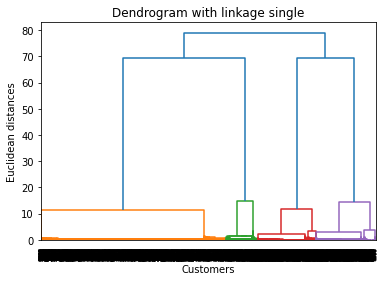

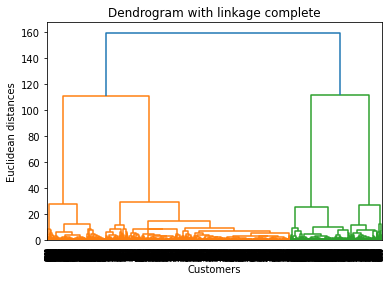

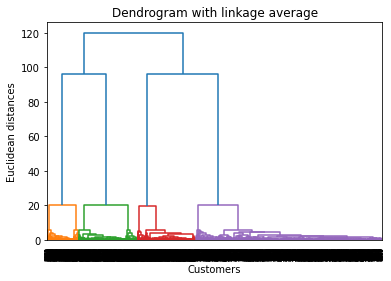

In [172]:
## iterative plot for different linkages
for i in range(0,len(li)):


  dendro = sch.dendrogram(sch.linkage(X_projected, method = li[i]))
  plt.title('Dendrogram with linkage '+li[i])
  plt.xlabel('Customers')
  plt.ylabel('Euclidean distances')
  plt.show()

As we can see complete and average linkkages are separating all points in single clusters we can now try ward linkage.

Ward uses Anova that is analysis of variance hence it is supirior in clustering datapoints than rest methods which just consider distance measures.

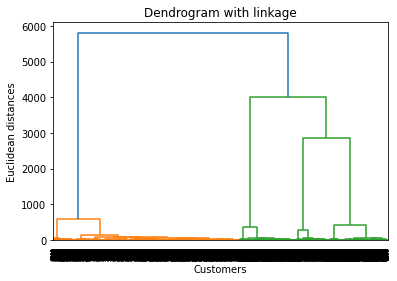

In [173]:
## Finding optimal clusters
dendro_ward = sch.dendrogram(sch.linkage(X_projected, method = "ward"))
plt.title('Dendrogram with linkage')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [174]:
unique_colours = set(dendro_ward["color_list"])

In [175]:
##optimal clusters

optimal_clusters = len(unique_colours)-1

In [176]:
optimal_clusters

2

- With PCA we get better model with less noise and we have summerized 12 componets in just 2 PCA components.
- As per graph we have 2 optimum clusters for Internet usage dataset.

In [177]:
import math


def distance(p, q):
    return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))


def single_link(ci, cj):
    return min([distance(vi, vj) for vi in ci for vj in cj])


def complete_link(ci, cj):
    return max([distance(vi, vj) for vi in ci for vj in cj])


def average_link(ci, cj):
    distances = [distance(vi, vj) for vi in ci for vj in cj]
    return sum(distances) / len(distances)


def get_distance_measure(M):
    if M == 0:
        return single_link
    elif M == 1:
        return complete_link
    else:
        return average_link

In [178]:
import math



class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K, M):
        self.data = data
        self.N = len(data)
        self.K = K
        #0-single_link, 1-complete_link, 2-average_link"
        self.measure = get_distance_measure(M)
        self.clusters = self.init_clusters()



  
    def distance(p, q):
      return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))

    def init_clusters(self):
        return {data_id: [data_point] for data_id, data_point in enumerate(self.data)}

    def find_closest_clusters(self):
        min_dist = math.inf
        closest_clusters = None

        clusters_ids = list(self.clusters.keys())

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id):
        new_clusters = {0: self.clusters[ci_id] + self.clusters[cj_id]}

        for cluster_id in self.clusters.keys():
            if (cluster_id == ci_id) | (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
        return new_clusters

    def run_algorithm(self):
        while len(self.clusters.keys()) > self.K:
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)


    ####### custom clusters function to print hierarchial clusters
    def print(self):

   
      
        for id, points in self.clusters.items():
            print("Cluster: {}".format(id))
            for point in points:
                
                x = point[0]
                y = point[1]
                plt.scatter(x, y)

            plt.show()
    

In [179]:
## converting numpy array into dataframe
d = {"PCA1": X_projected[:,0], "PCA2": X_projected[:,1]}
df = pd.DataFrame(d)

In [180]:
df.shape

(7354, 2)

In [181]:
## Using few the rows of dataframe as randomly shuffled samples
df = df.sample(frac=0.125).reset_index(drop=True)

In [182]:
df.shape

(919, 2)

Here we are randomly selecting 500 records from 4000 records to fed to Hierarchial model.

In [183]:
### converting dataframe back to numpy array
df.values

array([[-4.17475130e+01,  7.08978862e-02],
       [ 2.83578746e+01,  6.27303058e+01],
       [ 2.95038140e+01,  6.28050601e+01],
       ...,
       [ 9.25813598e+01, -8.26444430e+00],
       [-3.64098687e+01, -1.91693405e+01],
       [-3.92959718e+01, -1.10726175e+00]])

### **0) Single Link**

In [184]:
agg_hierarchical_clustering_single = AgglomerativeHierarchicalClustering(df.values, 2, 0)
agg_hierarchical_clustering_single.run_algorithm()

Cluster: 0


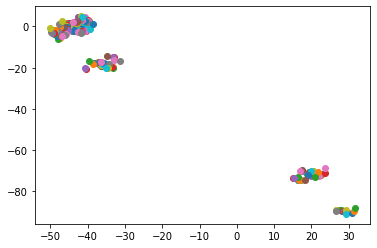

Cluster: 1


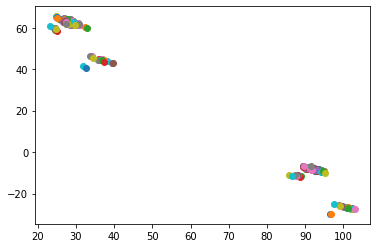

In [185]:
agg_hierarchical_clustering_single.print()

Insights:

Hierarchial method with single linkage has separated 2 clusters last cluster is showing clear outlier.

For each cluster we are having custom print function to display the datapoints within that cluster and there by showing 2 clusters separation clearly.

The PCA component 1 is going from negative axis to positive and separating clusters shown as per PCA component 1 and 2 increases

### **1) Complete Link**

In [ ]:
agg_hierarchical_clustering_complete = AgglomerativeHierarchicalClustering(df.values, 2, 1)
agg_hierarchical_clustering_complete.run_algorithm()

In [ ]:
agg_hierarchical_clustering_complete.print()

Insights:

Hierarchial method has separated points in 2 clusters based on complete linkage.

For each cluster we are having custom print function to display the datapoints within that cluster and there by showing 2 graphs.



### **2) Average Link**

Now let's see the average link clusters.

In [ ]:
agg_hierarchical_clustering_average = AgglomerativeHierarchicalClustering(df.values, 2, 2)
agg_hierarchical_clustering_average.run_algorithm()

In [ ]:
agg_hierarchical_clustering_average.print()

Insights:

Hierarchial method has separated poings in 2 clusters based on Average linkage.

For each cluster we are having custom print function to display the datapoints within that cluster and there by showing 2 graphs.

Complete and Average linkages are having similar separation but single linkage is different.

## **DBScan cluster**

[[0.9268429  0.5421246  0.22176575 0.49343416]
 [0.92978948 0.47714745 0.61983795 0.45965816]
 [0.98070062 0.57758797 0.55819205 0.55262771]
 [0.9391177  0.49595429 0.5680637  0.56053933]
 [0.93820261 0.57900437 0.2405278  0.51053401]
 [0.73487907 0.48708615 0.         0.35971797]
 [0.91222947 0.5068694  0.38024214 0.61872656]
 [0.91641398 0.48145823 0.25969447 0.55987984]
 [0.93503939 0.53865278 0.80560657 0.41889325]
 [0.95573063 0.54570336 0.56827674 0.47132154]
 [0.85185568 0.52743487 0.09184133 0.37678542]
 [0.90945341 0.48979158 0.32052315 0.59839583]
 [0.97050487 0.58324929 0.7226731  0.42588015]
 [1.         0.67594837 0.84225469 0.40973797]
 [0.85484523 0.7095862  0.24241567 0.16303952]
 [0.72411925 0.56155327 0.02877608 0.22261474]
 [0.823545   0.58399397 0.12159029 0.34826381]
 [0.87232134 0.47762762 0.15388088 0.5172906 ]
 [0.72464526 0.50533074 0.00955596 0.2504979 ]
 [0.83625357 0.50041861 0.06919897 0.47723139]
 [0.81576148 0.42268056 0.11270432 0.40202533]
 [0.81574522 

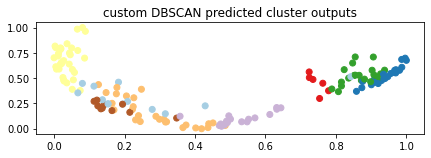

In [187]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_iris
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

#Custom estimator for gridsearch 
class MyClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self,e=0,minp=0):
       
        self.e =e
        self.minp=minp
        
        
    def fit(self, X,Y):
        self.Y=Y
  
		#print(self.Y)
        DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X, 'euclidean'))
		#print(DistanceMatrix)

        core_point_array=np.zeros(150)
        cluster_array=np.zeros(150)
        PointNeighbors=[]
		
        e=self.e
        k=self.minp
		#print(e)
        w=0
        for i in range(len(DistanceMatrix)):
	
            PointNeighbors=np.where(DistanceMatrix[i]<=e)[0]
            if len(PointNeighbors)>=k:
                core_point_array[i]=1
                if cluster_array[i]==0:
                    cluster_array[i]=w
                    w=w+1
		
                for x in range(len(PointNeighbors)):
					#print(cluster_array[PointNeighbors[x]])
                    if cluster_array[PointNeighbors[x]]==0:
                        cluster_array[PointNeighbors[x]]=cluster_array[i]
		
		
		
			
				#print(PointNeighbors)
		
	
        for x in range(len(cluster_array)):
            cluster_array[x]=cluster_array[x]-1	


	
		#print('Number of core points -'+str( np.count_nonzero(core_point_array)))	
		#print('Number of clusters -'+str( np.count_nonzero(cluster_array)))	

		#print(target_data)
		#print(core_point_array)
		#print(cluster_array)
		
        self.cluster_array=cluster_array
        return cluster_array
       
       
       
    def predict(self, X):
         # Some code
         return self.cluster_array 


    def score(self, X, Y):
        dt=f1_score(self.Y,self.cluster_array,average='weighted')
        print('Accuracy -'+str(dt))
        return (dt)

        
        
def DBSCAN(normalised_distance):


	DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalised_distance, 'euclidean'))
	#print(DistanceMatrix)

	core_point_array=np.zeros(150)
	cluster_array=np.zeros(150)
	PointNeighbors=[]
	e=0.3
	k=18
	w=0
	for i in range(len(DistanceMatrix)):
	
		PointNeighbors=np.where(DistanceMatrix[i]<=e)[0]
		if len(PointNeighbors)>=k:
			core_point_array[i]=1
			if cluster_array[i]==0:
				cluster_array[i]=w
				w=w+1
		
			for x in range(len(PointNeighbors)):
				#print(cluster_array[PointNeighbors[x]])	
				if cluster_array[PointNeighbors[x]]==0:
					cluster_array[PointNeighbors[x]]=cluster_array[i]
		
		
		
			
			#print(PointNeighbors)
		
	
	for x in range(len(cluster_array)):
			cluster_array[x]=cluster_array[x]-1	


	
	#print('Number of core points -'+str( np.count_nonzero(core_point_array)))	
	#print('Number of clusters -'+str( np.count_nonzero(cluster_array)))	

	#print(target_data)
	#print(core_point_array)
	print(cluster_array)

	return cluster_array


###################################################################################################
#Getting iris data

iris =load_iris()
input_data=iris.data
#target_data=iris.target

###################################################################################################
#Data Manipulations before introducing to the algorithm

poly = PolynomialFeatures(2)
input_data=poly.fit_transform(input_data)  
#print(input_data)

input_data=QuantileTransformer(n_quantiles=40, random_state=0).fit_transform(input_data)

scaler = MinMaxScaler()
 
scaler.fit(input_data)
normalised_input_data=scaler.transform(input_data)

distan=pairwise_distances(normalised_input_data,metric='euclidean')


scaler.fit(distan)
normalised_distance=scaler.transform(distan)


sscaler = StandardScaler()
sscaler.fit(normalised_distance)
normalised_distance=sscaler.transform(normalised_distance)


pca = PCA(n_components=4)
normalised_distance = pca.fit_transform(normalised_distance)

scaler.fit(normalised_distance)
normalised_distance=scaler.transform(normalised_distance)


print(normalised_distance)
print('normalised_distance')


##############################################################################################
#Training the algorithm using GridSearch



eps_values= np.arange(0.1,0.5 ,0.001)
min_sample_values = np.arange(2,30,1)

params = {
    'e':eps_values,
    'minp':min_sample_values
}
cv = [(slice(None), slice(None))]
gs = GridSearchCV(MyClassifier(), param_grid=params, cv=cv)

#gs.fit(normalised_distance,normalised_distance)

#print(gs.best_params_)

#para=gs.best_params_



#############################################################################################
#Testing the best selected parameters by plotting 


#e=para['e']
#k=para['minp']


cluster_array=DBSCAN(normalised_distance)


#print(target_data)
#print(cluster_array.astype(int))

#print('precision_score- '+str(precision_score(target_data,cluster_array,average='weighted',labels=np.unique(cluster_array))))
#print('recall_score- '+str(recall_score(target_data,cluster_array,average='weighted',labels=np.unique(cluster_array))))

plt.subplot(2, 1, 1)
plt.scatter(normalised_distance[:,0], normalised_distance[:,1],c=cluster_array, cmap='Paired')
plt.title("custom DBSCAN predicted cluster outputs")

#plt.subplot(2, 1, 2)
#plt.scatter(normalised_distance[:,0], normalised_distance[:,1],c=target_data, cmap='Paired')
#plt.title("Actual target outputs")

plt.tight_layout()
plt.show()




Insights:

As compared to KMeans DBscan has better cluster patterns with values spread in 8 clusters.

Features are scaled for Kmeans and Hierarchial clusters as these are distance based algorithm. Output of these algorithms gave 2 as optimal cluster.

Whereas DBscan being density based technique it is performing better and further separation of datapoints which are density packed is shown in the plot.

In Kmeans and Hierarchial PCA components can be used to reduce noice and better performace as they are distance based but not with DBscan.



# **Supervised Methodology**

### Expert and Novice Internet users as Target Variable

In [592]:
df.shape

(10040, 14)

In [593]:
df['Years on Internet'].value_counts()

2    3843
0    1849
1    1828
3    1824
4     696
Name: Years on Internet, dtype: int64

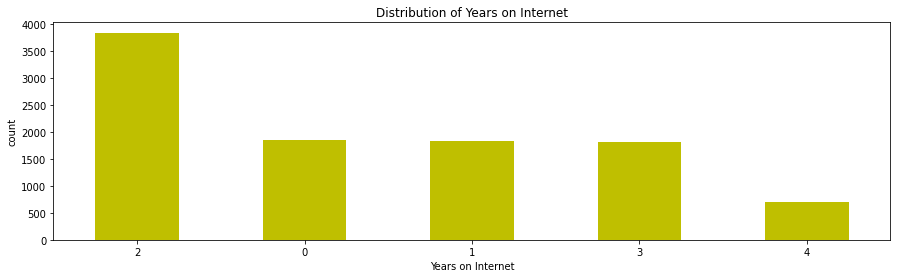

In [594]:
plt.figure(figsize = (15, 4))
df['Years on Internet'].value_counts(sort=True).plot(
    kind='bar', color='y', rot=0)
plt.ylabel('count')
plt.xlabel('Years on Internet')
plt.title("Distribution of Years on Internet")
plt.show()

Encoding:

    Under 6 mo=0
    6-12 mo=1
    1-3 yr=2
    4-6 yr=3 
    Over 7 yr=4


* We can use these categories to classify internet users based on years on internet.
* Novices are the once on the Internet in the past 6 months and in the past 6-12 months. 
* Most Experts are the once on the Internet for 4-6 years.
* Expert users are on the internet for 7 years or more.





In [622]:
conditions = [
    (df['Years on Internet'].isin([0, 1])),
    (df['Years on Internet'].isin([2,3,4]))
  
    ]

## Novice,Expert users
values = [0,1]

df['Internet_Users_classes'] = np.select(conditions, values)

In [623]:
# Data contains 14 feature variables and 1 target variable Years on Internet
# Define features and labels

In [624]:
df['Internet_Users_classes'].value_counts()

1    3677
0    3677
Name: Internet_Users_classes, dtype: int64

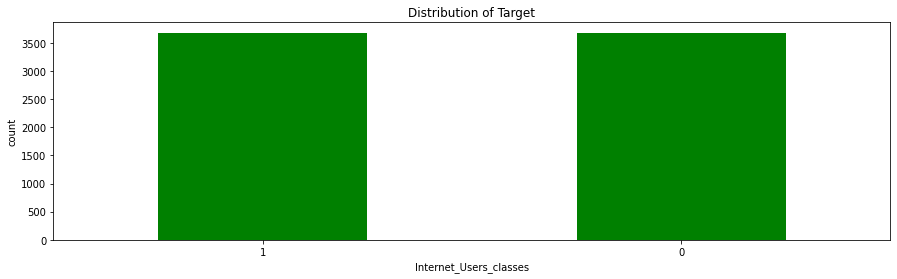

In [625]:
plt.figure(figsize = (15, 4))
df['Internet_Users_classes'].value_counts(sort=True).plot(
    kind='bar', color='g', rot=0)
plt.ylabel('count')
plt.xlabel('Internet_Users_classes')
plt.title("Distribution of Target")
plt.show()

As we can see the dataset is biased towards Expert Internet users with 60% falling in class 1 and 40% in class of Novice users. 

Methods for Handling Imbalanced Data



* Random Under Sampling

* Random Over Sampling

In [599]:
# class count
count_class_1, count_class_0 = df['Internet_Users_classes'].value_counts()

In [600]:
count_class_0

3677

In [601]:
count_class_1

6363

In [602]:
# separate according to `label`
df_class_0 = df[df['Internet_Users_classes'] == 0]
df_class_1 = df[df['Internet_Users_classes'] == 1]

In [603]:
# sample only from class 1 quantity of rows of class 0
df_class_1_under = df_class_1.sample(count_class_0)


In [604]:
df = pd.concat([df_class_1_under, df_class_0], axis=0)

In [626]:
df['Internet_Users_classes'].value_counts()

1    3677
0    3677
Name: Internet_Users_classes, dtype: int64

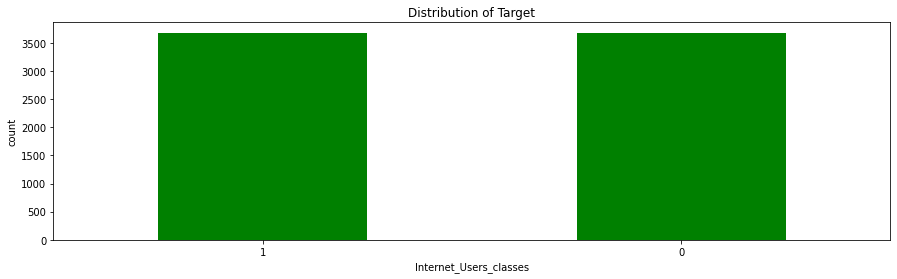

In [627]:
plt.figure(figsize = (15, 4))
df['Internet_Users_classes'].value_counts(sort=True).plot(
    kind='bar', color='g', rot=0)
plt.ylabel('count')
plt.xlabel('Internet_Users_classes')
plt.title("Distribution of Target")
plt.show()

As we can see the dataset bias is removed using undersampling.

## Define features and labels

In [640]:
df.head()

,Years on Internet,Primary Place of WWW Access,Age,Major Occupation,Education Attainment,Gender,Marital Status,Household Income,Primary Computing Platform,Most Import Issue Facing the Internet,Race,Sexual Preference,Registered to Vote,Major Geographical Location,Internet_Users_classes
5140,2,0,37,3,4,0,3,3,3.0,2,1,1,1,5,1
672,2,0,21,3,3,1,5,8,2.0,2,1,1,1,5,1
9467,3,0,24,3,4,0,99,2,2.0,2,1,1,1,5,1
5292,3,0,39,0,3,0,5,3,1.0,99,1,1,1,6,1
3127,3,2,17,3,1,0,5,5,2.0,2,1,1,3,5,1


In [641]:
# Data contains 14 feature variables and 1 target variable Years on Internet
# Define features and labels

In [642]:
y=df["Internet_Users_classes"].values

In [643]:
df = df.loc[:, df.columns != 'Internet_Users_classes']

In [644]:
df2.shape

(7354, 13)

In [645]:
x = df2.values

In [646]:
x.shape

(7354, 13)

## Feature Scaling

In [647]:
sc =StandardScaler()
x = sc.fit_transform(x)

## Split the dataset into training and test dataset 80:20

In [648]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=1234)

In [649]:
Xtrain.shape

(5883, 13)

In [650]:
Xtest.shape

(1471, 13)

In [651]:
Ytrain.shape

(5883,)

In [652]:
Ytest.shape

(1471,)

## **SVM Classifier**

In [659]:
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=10000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0.1
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [654]:
clf = SVM()

In [664]:
clf.fit(Xtrain, Ytrain)
predictions = clf.predict(Xtrain)

In [663]:
np.unique(predictions)

array([nan])

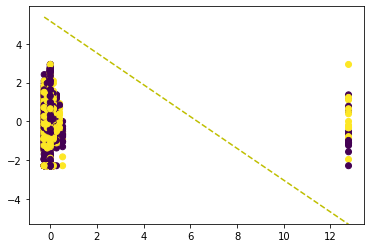

In [355]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], marker="o", c=Ytrain)
    x0_1 = np.amin(Xtrain[:, 0])
    x0_2 = np.amax(Xtrain[:, 0])
    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)
    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)
    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)
    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")
    x1_min = np.amin(Xtrain[:, 1])
    x1_max = np.amax(Xtrain[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])
    plt.show()
visualize_svm()

We can see clear classification between Novice and Expert internet users.

In [412]:
## Training accuracy
accuracy_score(Ytrain, predictions)

0.4968553459119497

In [413]:
predictions_test = clf.predict(Xtest)

In [414]:
## Test accuracy
accuracy_score(Ytest, predictions_test)

0.512576478585996

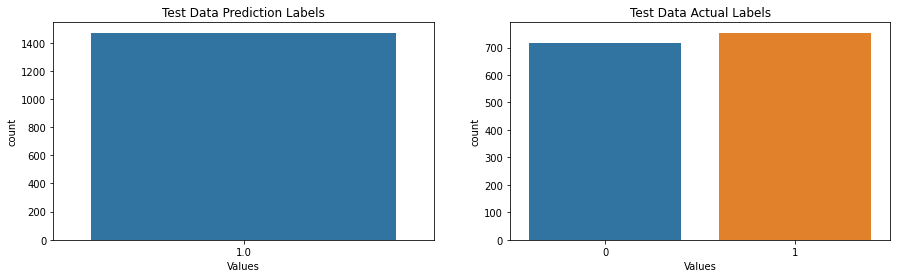

In [415]:
## Analysing output plots for test data


plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.title("Test Data Prediction Labels")

sns.countplot(x=predictions_test)
plt.xlabel("Values")
plt.ylabel("count")

plt.subplot(1, 2, 2)
plt.title("Test Data Actual Labels")

sns.countplot(x=Ytest)
plt.xlabel("Values")
plt.ylabel("count")
plt.show()

In [376]:
cm_SVM = confusion_matrix(Ytest, predictions_test)

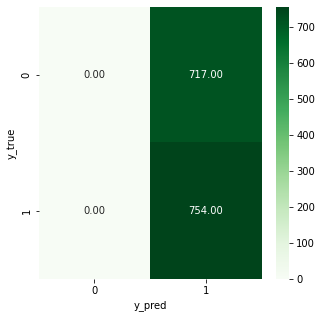

In [377]:
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm_SVM,annot = True, cmap = 'Greens', fmt='.2f')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Accuracy for SVM

|Model|  Train  |   Test  |
|-----|---------|---------|
| SVM |  50.00% | 51. %   |

## **Random Forest Classifier**

In [133]:
## define the random forest classes ##
#class for random forest classifier
#from sklearn.tree import DecisionTreeClassifier
#base class for the random forest algorithm
class RandomForest(ABC):
    #initializer
    def __init__(self,n_trees=100):
        self.n_trees = n_trees
        self.trees   = []
        
    #private function to make bootstrap samples
    def __make_bootstraps(self,data):
        #initialize output dictionary & unique value count
        dc   = {}
        unip = 0
        #get sample size
        b_size = data.shape[0]
        #get list of row indexes
        idx = [i for i in range(b_size)]
        #loop through the required number of bootstraps
        for b in range(self.n_trees):
            #obtain boostrap samples with replacement
            sidx   = np.random.choice(idx,replace=True,size=b_size)
            b_samp = data[sidx,:]
            #compute number of unique values contained in the bootstrap sample
            unip  += len(set(sidx))
            #obtain out-of-bag samples for the current b
            oidx   = list(set(idx) - set(sidx))
            o_samp = np.array([])
            if oidx:
                o_samp = data[oidx,:]
            #store results
            dc['boot_'+str(b)] = {'boot':b_samp,'test':o_samp}
        #return the bootstrap results
        return(dc)
  
    #public function to return model parameters
    def get_params(self, deep = False):
        return {'n_trees':self.n_trees}

    #protected function to obtain the right decision tree
    @abstractmethod
    def _make_tree_model(self):
        pass
    
    #protected function to train the ensemble
    def _train(self,X_train,y_train):
        #package the input data
        training_data = np.concatenate((X_train,y_train.reshape(-1,1)),axis=1)
        #make bootstrap samples
        dcBoot = self.__make_bootstraps(training_data)
        #iterate through each bootstrap sample & fit a model ##
        tree_m = self._make_tree_model()
        dcOob    = {}
        for b in dcBoot:
            #make a clone of the model
            model = clone(tree_m)
            #fit a decision tree model to the current sample
            model.fit(dcBoot[b]['boot'][:,:-1],dcBoot[b]['boot'][:,-1].reshape(-1, 1))
            #append the fitted model
            self.trees.append(model)
            #store the out-of-bag test set for the current bootstrap
            if dcBoot[b]['test'].size:
                dcOob[b] = dcBoot[b]['test']
            else:
                dcOob[b] = np.array([])
        #return the oob data set
        return(dcOob)
       
    #protected function to predict from the ensemble
    def _predict(self,X):
        #check we've fit the ensemble
        if not self.trees:
            print('You must train the ensemble before making predictions!')
            return(None)
        #loop through each fitted model
        predictions = []
        for m in self.trees:
            #make predictions on the input X
            yp = m.predict(X)
            #append predictions to storage list
            predictions.append(yp.reshape(-1,1))
        #compute the ensemble prediction
        ypred = np.mean(np.concatenate(predictions,axis=1),axis=1)
        #return the prediction
        return(ypred)

In [134]:
#class to control tree node
class Node:
    #initializer
    def __init__(self):
        self.__Bs    = None
        self.__Bf    = None
        self.__left  = None
        self.__right = None
        self.leafv   = None

    #set the split,feature parameters for this node
    def set_params(self,Bs,Bf):
        self.__Bs = Bs
        self.__Bf = Bf
        
    #get the split,feature parameters for this node
    def get_params(self):
        return(self.__Bs,self.__Bf)    
        
    #set the left/right children nodes for this current node
    def set_children(self,left,right):
        self.__left  = left
        self.__right = right
        
    #get the left child node
    def get_left_node(self):
        return(self.__left)
    
    #get the right child node
    def get_right_node(self):
        return(self.__right)

In [135]:

class RandomForestClassifier(RandomForest):
    #initializer
    def __init__(self,n_trees=100,max_depth=None,min_samples_split=2,loss='gini',balance_class_weights=False):
        super().__init__(n_trees)
        self.max_depth             = max_depth
        self.min_samples_split     = min_samples_split
        self.loss                  = loss
        self.balance_class_weights = balance_class_weights
        
    #protected function to obtain the right decision tree
    def _make_tree_model(self):
        return(DecisionTreeClassifier())
    
    #public function to return model parameters
    def get_params(self, deep = False):
        return {'n_trees':self.n_trees,
                'max_depth':self.max_depth,
                'min_samples_split':self.min_samples_split,
                'loss':self.loss,
                'balance_class_weights':self.balance_class_weights}
    
    #train the ensemble
    def fit(self,X_train,y_train,print_metrics=False):
        #call the protected training method
        dcOob = self._train(X_train,y_train)
        #if selected, compute the standard errors and print them
        if print_metrics:
            #initialise metric arrays
            accs = np.array([])
            pres = np.array([])
            recs = np.array([])
            #loop through each bootstrap sample
            for b,m in zip(dcOob,self.trees):
                #compute the predictions on the out-of-bag test set & compute metrics
                if dcOob[b].size:
                    yp  = m.predict(dcOob[b][:,:-1])
                    acc = accuracy_score(dcOob[b][:,-1],yp)
                    pre = precision_score(dcOob[b][:,-1],yp,average='weighted')   
                    rec = recall_score(dcOob[b][:,-1],yp,average='weighted')
                    #store the error metrics
                    accs = np.concatenate((accs,acc.flatten()))
                    pres = np.concatenate((pres,pre.flatten()))
                    recs = np.concatenate((recs,rec.flatten()))
            #print standard errors
            print("Standard error in accuracy: %.2f" % np.std(accs))
            print("Standard error in precision: %.2f" % np.std(pres))
            print("Standard error in recall: %.2f" % np.std(recs))
            
    #predict from the ensemble
    def predict(self,X):
        #call the protected prediction method
        ypred = self._predict(X)
        #convert the results into integer values & return
        return(np.round(ypred).astype(int))

In [136]:
#create a random forest with balanced class weights
rfc = RandomForestClassifier()

In [137]:

## train the ensemble & view estimates for prediction error 
rfc.fit(Xtrain,Ytrain,print_metrics=True)

Standard error in accuracy: 0.01
Standard error in precision: 0.01
Standard error in recall: 0.01


In [138]:
## use k fold cross validation to measure performance ##
scoring_metrics = {'accuracy': make_scorer(accuracy_score), 
                   'precision': make_scorer(precision_score, average='weighted'),
                   'recall': make_scorer(recall_score, average='weighted')}

dcScores        = cross_validate(rfc,Xtrain,Ytrain,cv=StratifiedKFold(10),scoring=scoring_metrics)
print('Mean Accuracy: %.2f' % np.mean(dcScores['test_accuracy']))
print('Mean Precision: %.2f' % np.mean(dcScores['test_precision']))
print('Mean Recall: %.2f' % np.mean(dcScores['test_recall']))

Mean Accuracy: 0.77
Mean Precision: 0.77
Mean Recall: 0.77


In [139]:
accuracy_score(Ytest, rfc.predict(Xtest))

0.7872195785180149

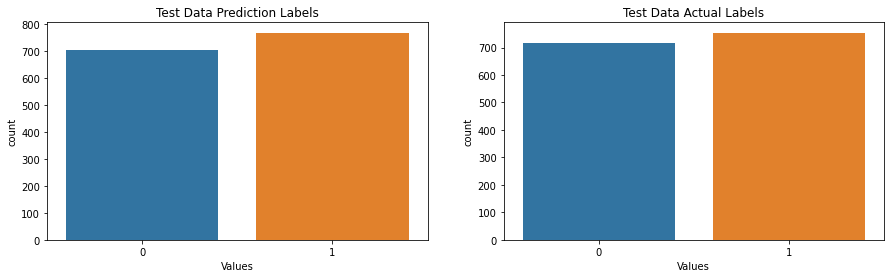

In [143]:
## Analysing output plots for test data


plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.title("Test Data Prediction Labels")

sns.countplot(x=rfc.predict(Xtest))
plt.xlabel("Values")
plt.ylabel("count")

plt.subplot(1, 2, 2)
plt.title("Test Data Actual Labels")

sns.countplot(x=Ytest)
plt.xlabel("Values")
plt.ylabel("count")
plt.show()

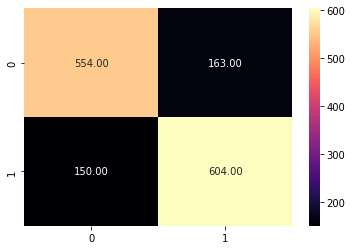

In [155]:
cm = confusion_matrix(Ytest, rfc.predict(Xtest))
sns.heatmap(cm,annot = True, cmap = 'magma', fmt='.2f')
plt.show()

Accuracy for Random Forest

|Model|  Train  |   Test  |
|-----|---------|---------|
| RFT |  77.00% | 78.72%  |

# **Neural Network**

 ### With relu Activation Function

In [ ]:
class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[13,8,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
    
    def relu(self,Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0,Z)

    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)


    def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))

    def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss

    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss

    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 

    def acc(self, y, yhat):
        '''
        Calculates the accuracy between the predicted values and actual
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()  



In [ ]:
## number of hidden nodes 5
nn5 = NeuralNet(layers=[14,5,1], learning_rate=0.001, iterations=10000) # create the NN model
nn5.fit(Xtrain, Ytrain) #train the model

In [ ]:
train_pred = nn5.predict(Xtrain)
test_pred = nn5.predict(Xtest)

In [ ]:
np.unique(train_pred)

array([0., 1.])

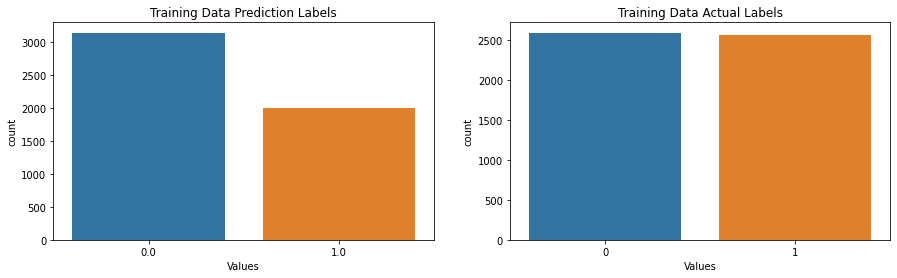

In [ ]:
## Analysing output plots for Training data

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.title("Training Data Prediction Labels")

sns.countplot(x=train_pred[:, 0])
plt.xlabel("Values")
plt.ylabel("count")




plt.subplot(1, 2, 2)
plt.title("Training Data Actual Labels")

sns.countplot(x=Ytrain[:, 0])
plt.xlabel("Values")
plt.ylabel("count")
plt.show()


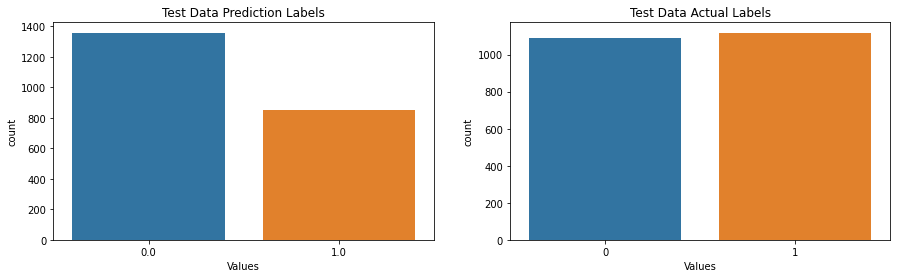

In [ ]:
## Analysing output plots for test data


plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.title("Test Data Prediction Labels")

sns.countplot(x=test_pred[:, 0])
plt.xlabel("Values")
plt.ylabel("count")

plt.subplot(1, 2, 2)
plt.title("Test Data Actual Labels")

sns.countplot(x=Ytest[:, 0])
plt.xlabel("Values")
plt.ylabel("count")
plt.show()


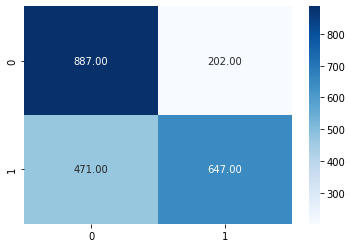

In [ ]:
NN_5Nodes = confusion_matrix(Ytest, test_pred)
sns.heatmap(NN_5Nodes,annot = True, cmap = 'Blues', fmt='.2f')
plt.show()

In [ ]:
print("Train accuracy is {}".format(nn5.acc(Ytrain, train_pred)))
print("Test accuracy is {}".format(nn5.acc(Ytest, test_pred)))

Train accuracy is 70
Test accuracy is 69


### with Sigmoid Activation function

In [ ]:
class NeuralNet_sigmoid():
    '''
    A two layer neural network
    '''  
    def __init__(self, layers=[13,5,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
    
    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)

    def tanh(self,Z):
        return (np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))
    
    # tanh activation function
    def dtanh(self, x):
	    return 1-(((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))*((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))))

    def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))

    def dsigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return (1/(1+np.exp(-Z))) * (1-(1/(1+np.exp(-Z))))

    def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss

    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.sigmoid(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss

    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dsigmoid(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.sigmoid(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 

    def acc(self, y, yhat):
        '''
        Calculates the accuracy between the predicted values and actual
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()  

In [ ]:
nn_sigmoid = NeuralNet_sigmoid( layers=[14,5,1], learning_rate=0.001, iterations=50000) # create the NN model
nn_sigmoid.fit(Xtrain, Ytrain) #train the model

In [ ]:
train_pred = nn_sigmoid.predict(Xtrain)
test_pred = nn_sigmoid.predict(Xtest)

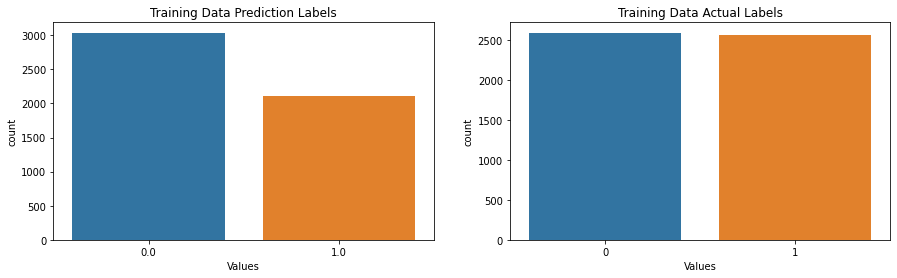

In [ ]:
## Analysing output plots for Training data

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.title("Training Data Prediction Labels")

sns.countplot(x=train_pred[:, 0])
plt.xlabel("Values")
plt.ylabel("count")




plt.subplot(1, 2, 2)
plt.title("Training Data Actual Labels")

sns.countplot(x=Ytrain[:, 0])
plt.xlabel("Values")
plt.ylabel("count")
plt.show()


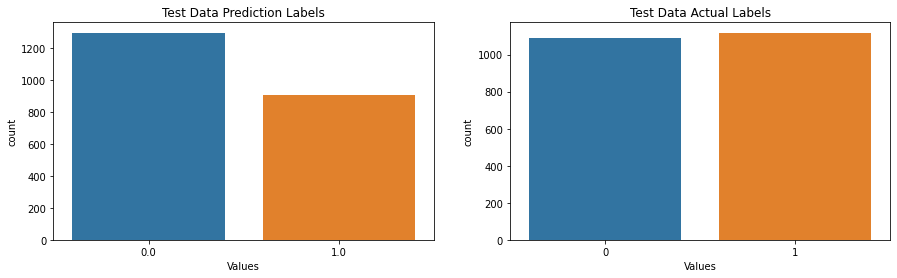

In [ ]:
## Analysing output plots for test data


plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.title("Test Data Prediction Labels")

sns.countplot(x=test_pred[:, 0])
plt.xlabel("Values")
plt.ylabel("count")

plt.subplot(1, 2, 2)
plt.title("Test Data Actual Labels")

sns.countplot(x=Ytest[:, 0])
plt.xlabel("Values")
plt.ylabel("count")
plt.show()

In [ ]:
print("Train accuracy is {}".format(nn_sigmoid.acc(Ytrain, train_pred)))
print("Test accuracy is {}".format(nn_sigmoid.acc(Ytest, test_pred)))

Train accuracy is 91
Test accuracy is 90


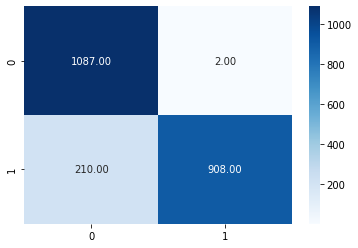

In [ ]:
NN_sigmoid = confusion_matrix(Ytest, test_pred)
sns.heatmap(NN_sigmoid,annot = True, cmap = 'Blues', fmt='.2f')
plt.show()

### with tanh activation function

In [ ]:
class NeuralNet_tanh():
    '''
    A two layer neural network
    '''  
    def __init__(self, layers=[13,5,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
    
    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)

    
    def tanh(self, x):
      return np.tanh(x)
    
    def dtanh(self, x):
	    return 1 - np.tanh(x)**2

    def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))

    def dsigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return (1/(1+np.exp(-Z))) * (1-(1/(1+np.exp(-Z))))

    def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss

    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.tanh(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss

    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dtanh(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.tanh(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred) 

    def acc(self, y, yhat):
        '''
        Calculates the accuracy between the predicted values and actual
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()  

In [ ]:
nn_tanh = NeuralNet_tanh( layers=[14,5,1], learning_rate=0.001, iterations=50000) # create the NN model
nn_tanh.fit(Xtrain, Ytrain) #train the model

In [ ]:
train_pred = nn_tanh.predict(Xtrain)
test_pred = nn_tanh.predict(Xtest)

In [ ]:
np.unique(train_pred)

array([0., 1.])

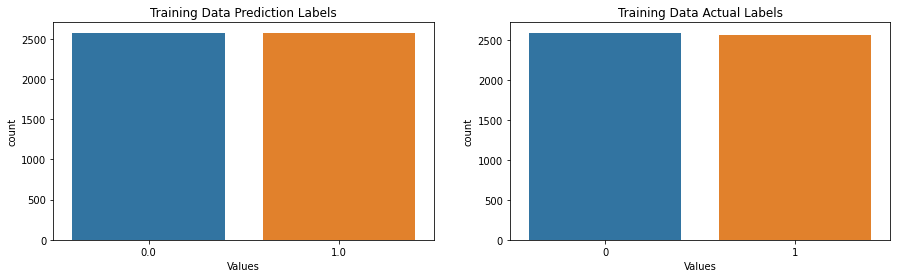

In [ ]:
## Analysing output plots for Training data

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.title("Training Data Prediction Labels")

sns.countplot(x=train_pred[:, 0])
plt.xlabel("Values")
plt.ylabel("count")

plt.subplot(1, 2, 2)
plt.title("Training Data Actual Labels")

sns.countplot(x=Ytrain[:, 0])
plt.xlabel("Values")
plt.ylabel("count")
plt.show()


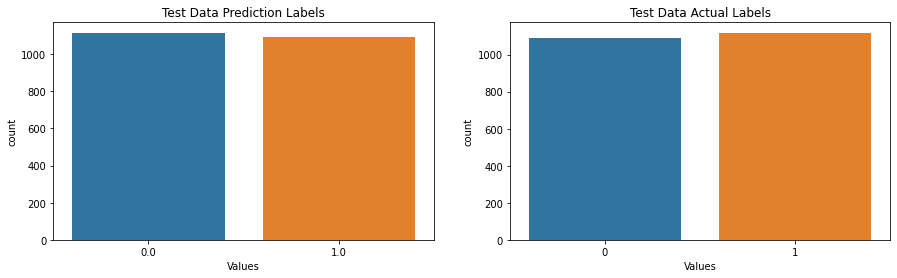

In [ ]:
## Analysing output plots for test data
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.title("Test Data Prediction Labels")

sns.countplot(x=test_pred[:, 0])
plt.xlabel("Values")
plt.ylabel("count")

plt.subplot(1, 2, 2)
plt.title("Test Data Actual Labels")

sns.countplot(x=Ytest[:, 0])
plt.xlabel("Values")
plt.ylabel("count")
plt.show()

In [ ]:
print("Train accuracy is {}".format(nn_tanh.acc(Ytrain, train_pred)))
print("Test accuracy is {}".format(nn_tanh.acc(Ytest, test_pred)))

Train accuracy is 89
Test accuracy is 90


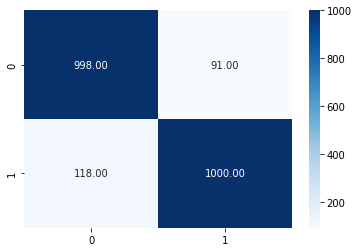

In [ ]:
NN_tanh = confusion_matrix(Ytest, test_pred)
sns.heatmap(NN_tanh, annot = True, cmap = 'Blues', fmt='.2f')
plt.show()

# **Model outcome and Performace Comparison**



#### **Accuracy**

|Model|  Train  |   Test  |
|-----|---------|---------|
| SVM |  50.00% | 51.00 % |
|-----|---------|---------|
| RF  | 77.00 % | 78.72%  |
|-----|---------|---------|
| NN  | 89.0  % | 90.0%   |

As we move from traditional machine learning models to more sophisticated neural nets accuracy takes leap. 

The class imbalance was removed to make sure model is predicting based on accurate inputs.

# **Conclusion**

Overall we tried to analyse the survey data from graphics and visualizations team at Gorgia Tech.

The survey data is used to study Internet user demographics.

Using Internet Data our efforts have been directed to understand who is using it, their age class, marital status and overall how it is being used.

For data Analysis we started with removing uneccessary features, null checks, duplicates and then summary statistics.

We used different visualizations for performing EDA for example Univariate, Bi-Variate, and Multivariate Analysis.

For each plot we have identified the insights and continued the exploration further.

Among the top findings, the gender ratio continues to move closer and closer to par, with 40% of the US respondents reporting being female.

Privacy overpowers censorship as the number one most important issue facing the Internet during 90s and continues to be important issue now.

Overall most of Internet users in 1997 were between age class 20 to 50 years.

Years on Internet is mostly between 3 to 7 years that is Expert Users.

Large amount of internet users were married or single.

Finally Web has truly become an important tool to access information and perform analytics.

In this analysis both Unsupervised and Supervised methods were focused towards customer segmentation into two types, Novice users and Expert users.

Results and trends with different algorithms are studied, compared and documented for business use as well as for public reasearch further.